# Title: Personalized Medical Recommendation System with Machine Learning

# Description:

Welcome to our cutting-edge Personalized Medical Recommendation System, a powerful platform designed to assist users in understanding and managing their health. Leveraging the capabilities of machine learning, our system analyzes user-input symptoms to predict potential diseases accurately.

# load dataset & tools

In [6]:
!pip install matplotlib
!pip install seaborn 

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
dataset = pd.read_csv('Training.csv')

In [9]:
dataset

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


# vals = dataset.values.flatten()

In [10]:
dataset.shape

(4920, 133)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [12]:
dataset.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
dataset.duplicated().sum()
## it is common to have dublicates in progonisis column

4616

# Visualization

In [14]:
dataset['prognosis']

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

In [15]:
# Count occurrences of each unique prognosis
prognosis_counts = dataset['prognosis'].value_counts()

# Get the count of 'Fungal infection'
count_fungal_infection = prognosis_counts['Fungal infection']

print("Number of occurrences of 'Fungal infection':", count_fungal_infection)

Number of occurrences of 'Fungal infection': 120


# train test split

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [17]:
X = dataset.drop('prognosis', axis=1)
y = dataset['prognosis']

# ecoding prognonsis
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

C:\Users\bagch\AppData\Local\Temp\ipykernel_6024\3261377150.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='prognosis', order=prognosis_counts.index, palette=colors)
C:\Users\bagch\AppData\Local\Temp\ipykernel_6024\3261377150.py:13: UserWarning: 
The palette list has fewer values (8) than needed (41) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=dataset, x='prognosis', order=prognosis_counts.index, palette=colors)


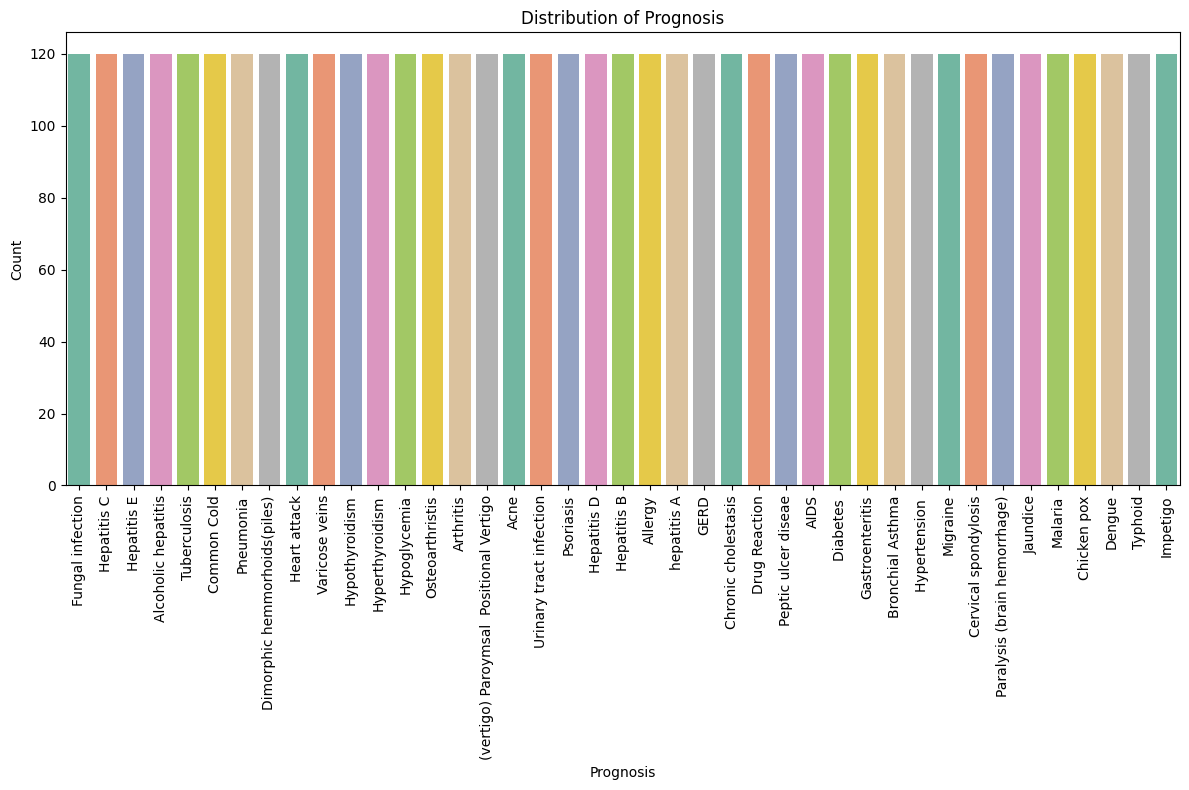

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count occurrences of each unique prognosis
prognosis_counts = dataset['prognosis'].value_counts()

# Define a colorful palette
colors = sns.color_palette('Set2')  # You can choose any palette you prefer

# Plotting
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.countplot(data=dataset, x='prognosis', order=prognosis_counts.index, palette=colors)
plt.xlabel('Prognosis')
plt.ylabel('Count')
plt.title('Distribution of Prognosis')
plt.xticks(rotation=90)  # Rotate x-labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



# Training top models

In [19]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np


# Create a dictionary to store models
models = {
    'SVC': SVC(kernel='linear'),
    "Gaussian NB": GaussianNB(),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
}

# Loop through the models, train, test, and print results
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))

    print("\n" + "="*40 + "\n")


SVC Accuracy: 1.0
SVC Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


Gaussian NB Accuracy: 1.0
Gaussian NB Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


RandomForest Accuracy: 1.0
RandomForest Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


GradientBoosting Accuracy: 1.0
GradientBoosting Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, 

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
    "SVC": SVC(kernel='linear'),
    "Gaussian NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=18),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K Neighbors": KNeighborsClassifier()
}

# Producing cross-validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv=10, n_jobs=-1, scoring=cv_scoring)
    print("-" * 50)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")


--------------------------------------------------
SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
--------------------------------------------------
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
--------------------------------------------------
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
--------------------------------------------------
Gradient Boosting
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
--------------------------------------------------
K Neighbors
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data by K Nearest Neighbors Classifier: 100.0
Accuracy on test data by K Nearest Neighbors Classifier: 100.0


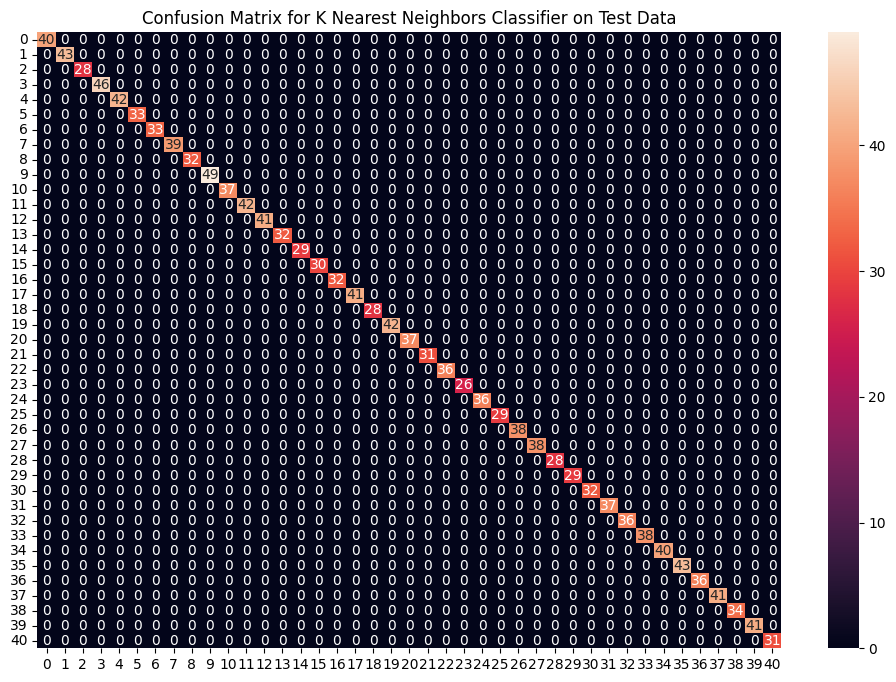

In [21]:


# Training and testing K Nearest Neighbors Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)
print(f"Accuracy on train data by K Nearest Neighbors Classifier: {accuracy_score(y_train, knn_model.predict(X_train)) * 100}")
print(f"Accuracy on test data by K Nearest Neighbors Classifier: {accuracy_score(y_test, knn_preds) * 100}")

cf_matrix = confusion_matrix(y_test, knn_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for K Nearest Neighbors Classifier on Test Data")
plt.show()


Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


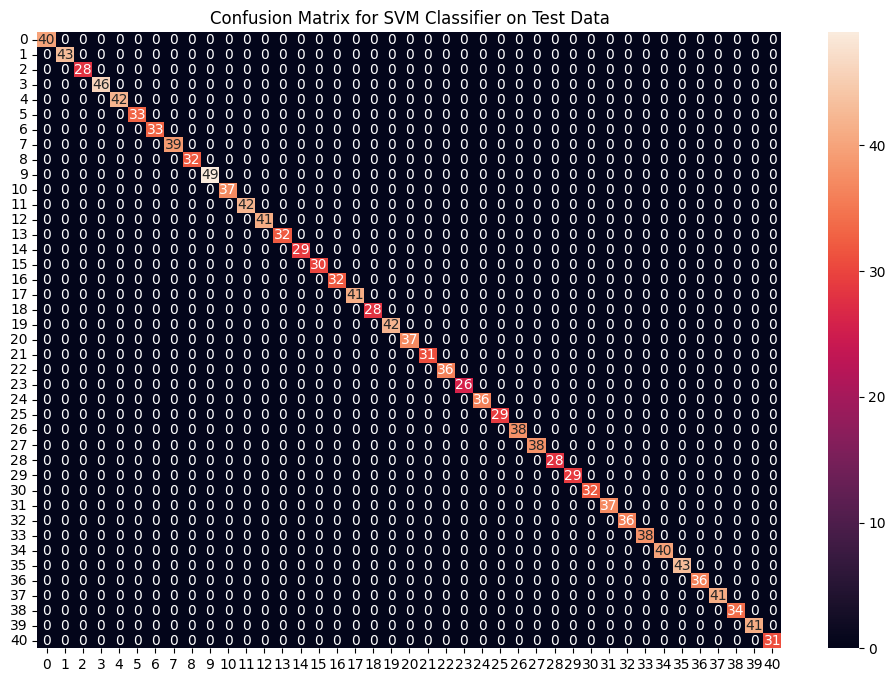

In [22]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier: {accuracy_score(y_train, svm_model.predict(X_train))*100}")
print(f"Accuracy on test data by SVM Classifier: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()



Accuracy on train data by GradientBoostingClassifier: 100.0
Accuracy on test data by GradientBoostingClassifier: 100.0


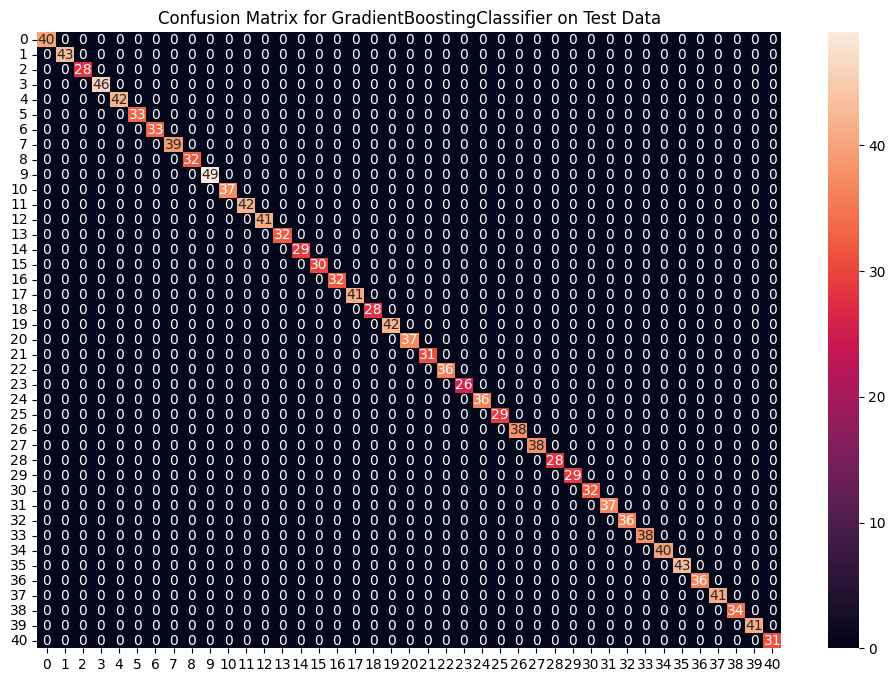

In [23]:
gb_model = GradientBoostingClassifier()  # Corrected instantiation
gb_model.fit(X_train, y_train)
preds = gb_model.predict(X_test)

print(f"Accuracy on train data by GradientBoostingClassifier: {accuracy_score(y_train, gb_model.predict(X_train)) * 100}")
print(f"Accuracy on test data by GradientBoostingClassifier: {accuracy_score(y_test, preds) * 100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for GradientBoostingClassifier on Test Data")
plt.show()

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


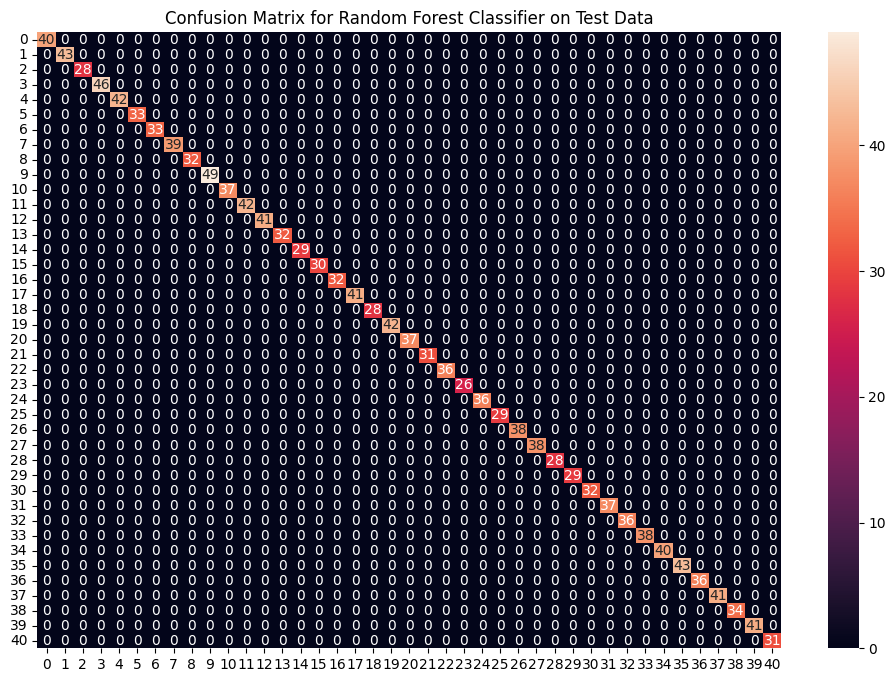

In [24]:

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

print(f"Accuracy on train data by Random Forest Classifier: {accuracy_score(y_train, rf_model.predict(X_train))*100}")
print(f"Accuracy on test data by Random Forest Classifier: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

#Fitting the models on whole data and validating on the test dataset¶

Accuracy on Test dataset by the combined model: 100.0


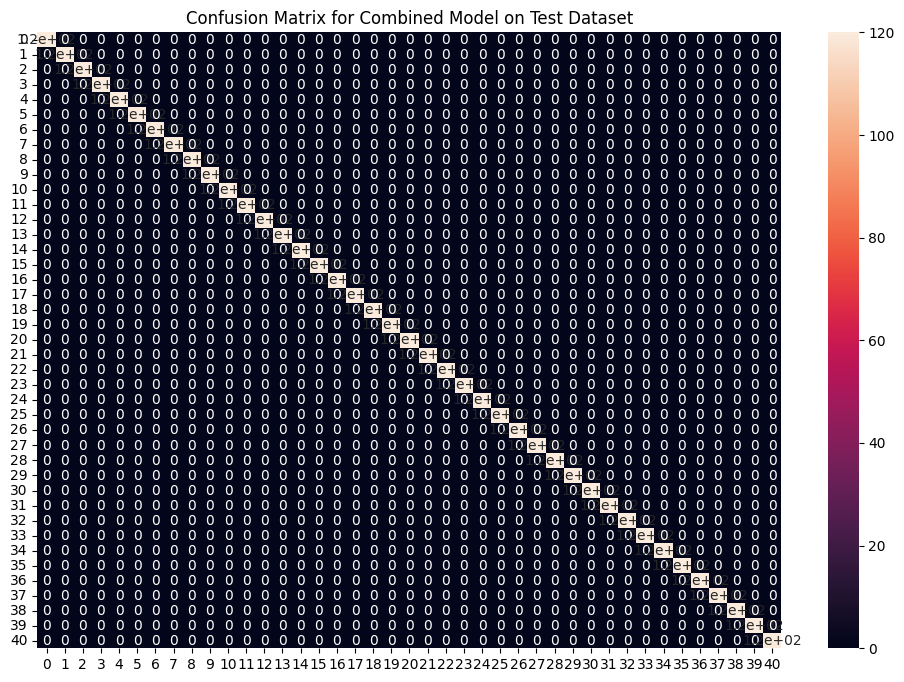

In [25]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode

# Assuming you have X, y, and test data defined

# Instantiate models
final_svm_model = SVC()
final_rf_model = RandomForestClassifier(random_state=42)
final_gb_model = GradientBoostingClassifier()
final_gnb_model = GaussianNB()  # Adding GaussianNB
final_knn_model = KNeighborsClassifier()  # Adding KNeighborsClassifier

# Fit models
final_svm_model.fit(X, y)
final_rf_model.fit(X, y)
final_gb_model.fit(X, y)
final_gnb_model.fit(X, y)
final_knn_model.fit(X, y)

# Reading the test data
test_data = pd.read_csv('Training.csv')

test_X = test_data.iloc[:, :-1]
test_Y = test_data.iloc[:, -1]  # Assuming labels are already encoded

# Make predictions
svm_preds = final_svm_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)
gb_preds = final_gb_model.predict(test_X)
gnb_preds = final_gnb_model.predict(test_X)
knn_preds = final_knn_model.predict(test_X)

final_preds = []

for svm_pred, gnb_pred, rf_pred, gb_pred, knn_pred in zip(svm_preds, gnb_preds, rf_preds, gb_preds, knn_preds):
    final_preds.append(mode([svm_pred, gnb_pred, rf_pred, gb_pred, knn_pred]))

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds) * 100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


# single prediction

In [26]:
# selecting svc
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test,ypred)

1.0

In [27]:
# save svc
import pickle
pickle.dump(svc,open('svc.pkl','wb'))

In [28]:
# load model
svc = pickle.load(open('svc.pkl','rb'))

In [29]:
# test 1:
print("predicted disease :",svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Disease :", y_test[0])

predicted disease : [40]
Actual Disease : 40


C:\Users\bagch\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [30]:
# test 2:
print("predicted disease :",svc.predict(X_test.iloc[100].values.reshape(1,-1)))
print("Actual Disease :", y_test[100])

predicted disease : [39]
Actual Disease : 39


C:\Users\bagch\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Recommendation System and Prediction

# load database and use logic for recommendations

In [31]:
sym_des = pd.read_csv("symtoms_df.csv")
precautions = pd.read_csv("precautions_df.csv")
workout = pd.read_csv("workout_df.csv")
description = pd.read_csv("description.csv")
medications = pd.read_csv('medications.csv')
diets = pd.read_csv("diets.csv")

In [32]:
diets

,Disease,Diet
0,Fungal infection,"['Antifungal Diet', 'Probiotics', 'Garlic', 'C..."
1,Allergy,"['Elimination Diet', 'Omega-3-rich foods', 'Vi..."
2,GERD,"['Low-Acid Diet', 'Fiber-rich foods', 'Ginger'..."
3,Chronic cholestasis,"['Low-Fat Diet', 'High-Fiber Diet', 'Lean prot..."
4,Drug Reaction,"['Antihistamine Diet', 'Omega-3-rich foods', '..."
5,Peptic ulcer disease,"['Low-Acid Diet', 'Fiber-rich foods', 'Ginger'..."
6,AIDS,"['Balanced Diet', 'Protein-rich foods', 'Fruit..."
7,Diabetes,"['Low-Glycemic Diet', 'Fiber-rich foods', 'Lea..."
8,Gastroenteritis,"['Bland Diet', 'Bananas', 'Rice', 'Applesauce'..."
9,Bronchial Asthma,"['Anti-Inflammatory Diet', 'Omega-3-rich foods..."


In [33]:
diets['Disease']

0                           Fungal infection
1                                    Allergy
2                                       GERD
3                        Chronic cholestasis
4                              Drug Reaction
5                       Peptic ulcer disease
6                                       AIDS
7                                   Diabetes
8                            Gastroenteritis
9                           Bronchial Asthma
10                              Hypertension
11                                  Migraine
12                      Cervical spondylosis
13              Paralysis (brain hemorrhage)
14                                  Jaundice
15                                   Malaria
16                               Chicken pox
17                                    Dengue
18                                   Typhoid
19                               hepatitis A
20                               Hepatitis B
21                               Hepatitis C
22        

In [34]:
diets['Disease'].duplicated().sum()

0

C:\Users\bagch\AppData\Local\Temp\ipykernel_6024\1548352590.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_diseases_df, x='Disease', y='Count', palette='viridis')


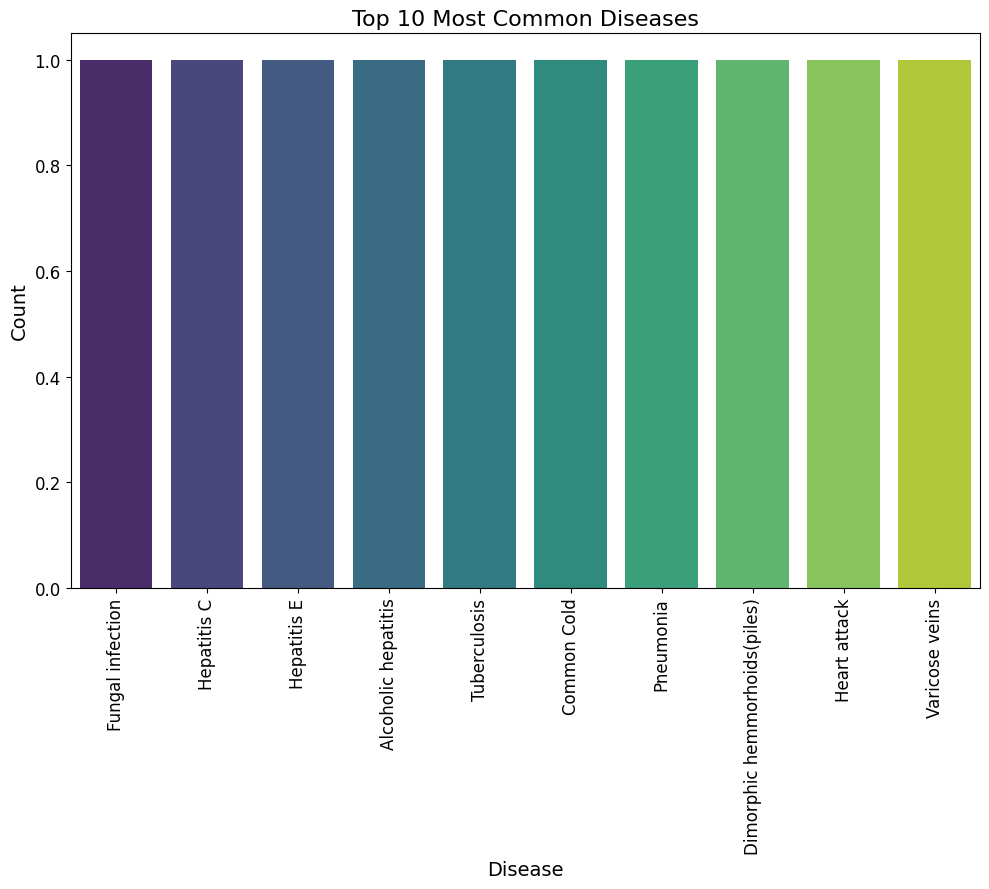

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the DataFrame if not already loaded
diets = pd.read_csv("diets.csv")

# Count occurrences of each unique disease
disease_counts = diets['Disease'].value_counts()

# Plot only the top N most common diseases
N = 10  # Change N to adjust the number of top diseases to display
top_diseases = disease_counts.head(N)

# Convert top diseases data to a DataFrame for seaborn
top_diseases_df = pd.DataFrame({'Disease': top_diseases.index, 'Count': top_diseases.values})

# Plotting using Seaborn
plt.figure(figsize=(10, 9))
sns.barplot(data=top_diseases_df, x='Disease', y='Count', palette='viridis')
plt.xlabel('Disease', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title(f'Top {N} Most Common Diseases', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\bagch\AppData\Local\Temp\ipykernel_6024\3365781055.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disease_counts.index, y=disease_counts.values, palette='viridis')


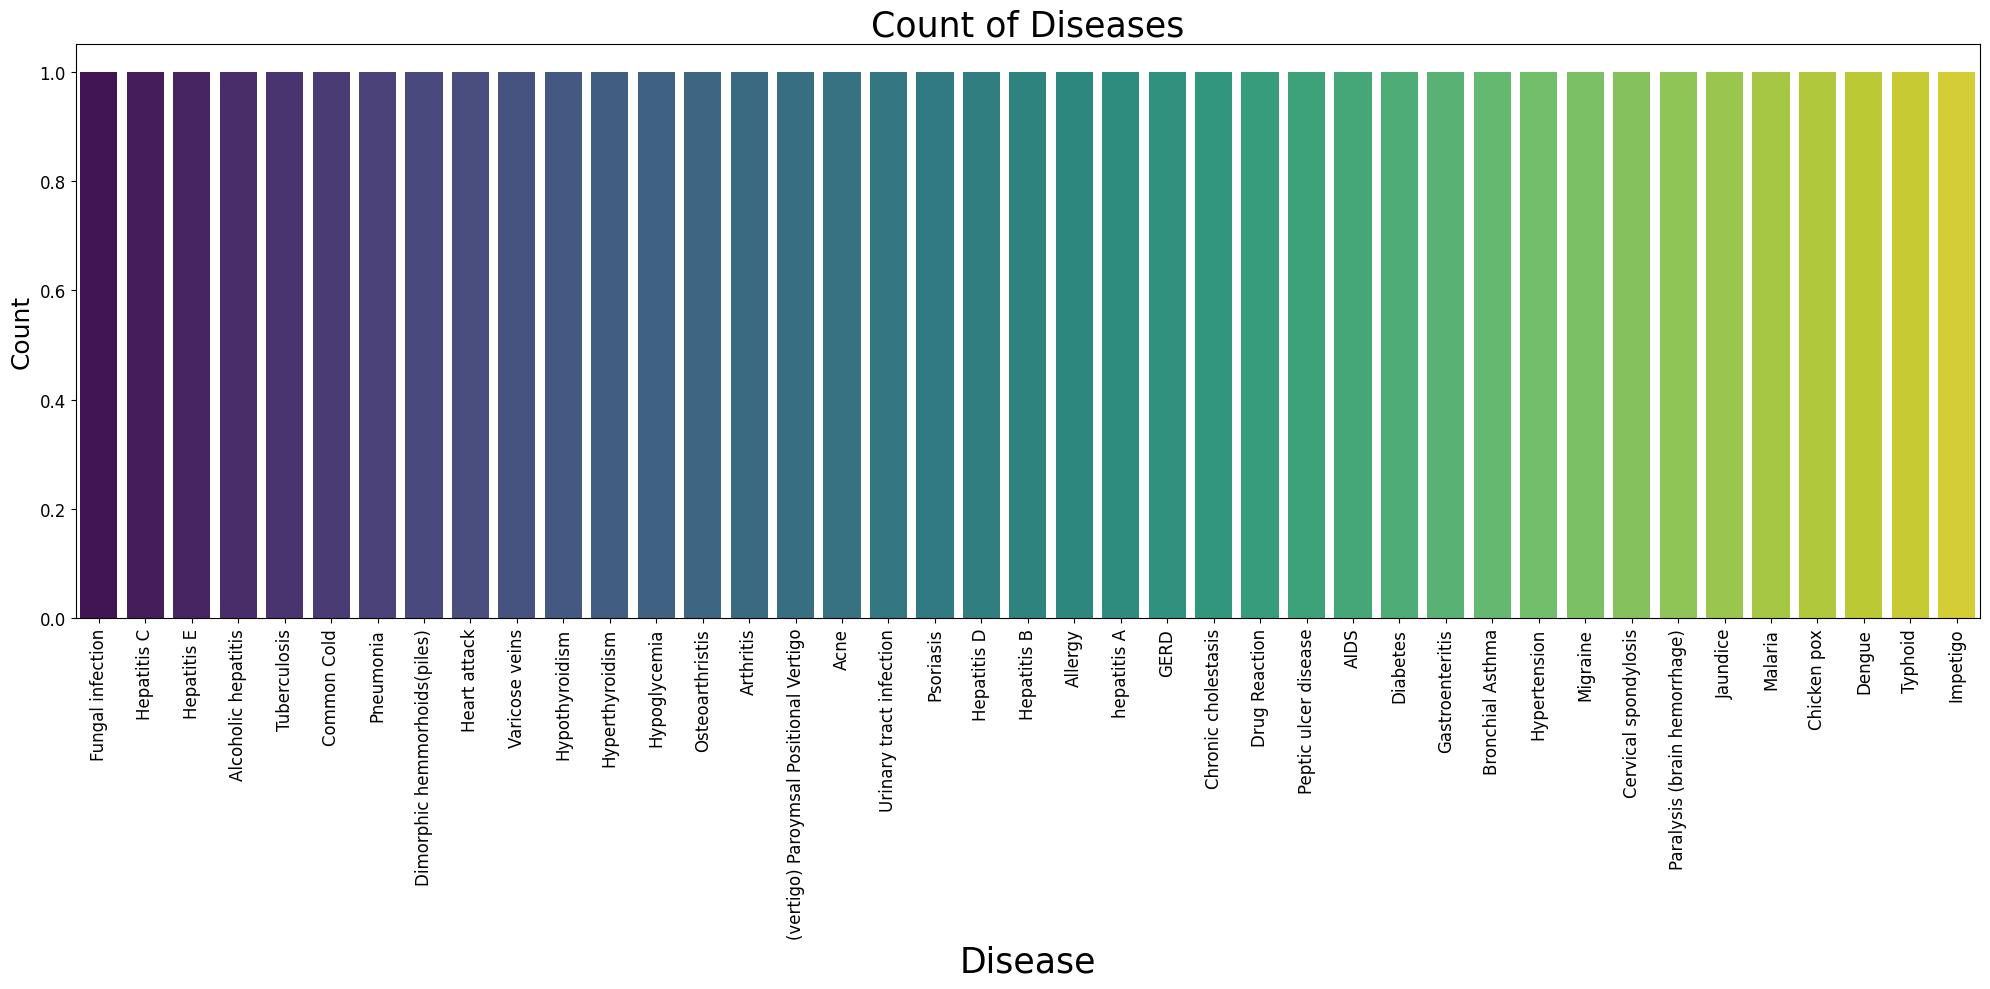

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the DataFrame if not already loaded
diets = pd.read_csv("diets.csv")

# Count occurrences of each unique disease
disease_counts = diets['Disease'].value_counts()

# Plotting with Seaborn
plt.figure(figsize=(20, 10))
sns.barplot(x=disease_counts.index, y=disease_counts.values, palette='viridis')
plt.xlabel('Disease', fontsize=25)
plt.ylabel('Count', fontsize=18)
plt.title('Count of Diseases', fontsize=25)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [37]:
sym_des

,Unnamed: 0,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches
1,1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN
2,2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN
3,3,Fungal infection,itching,skin_rash,dischromic _patches,NaN
4,4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN
...,...,...,...,...,...,...
4915,4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements
4916,4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring
4917,4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine
4918,4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting


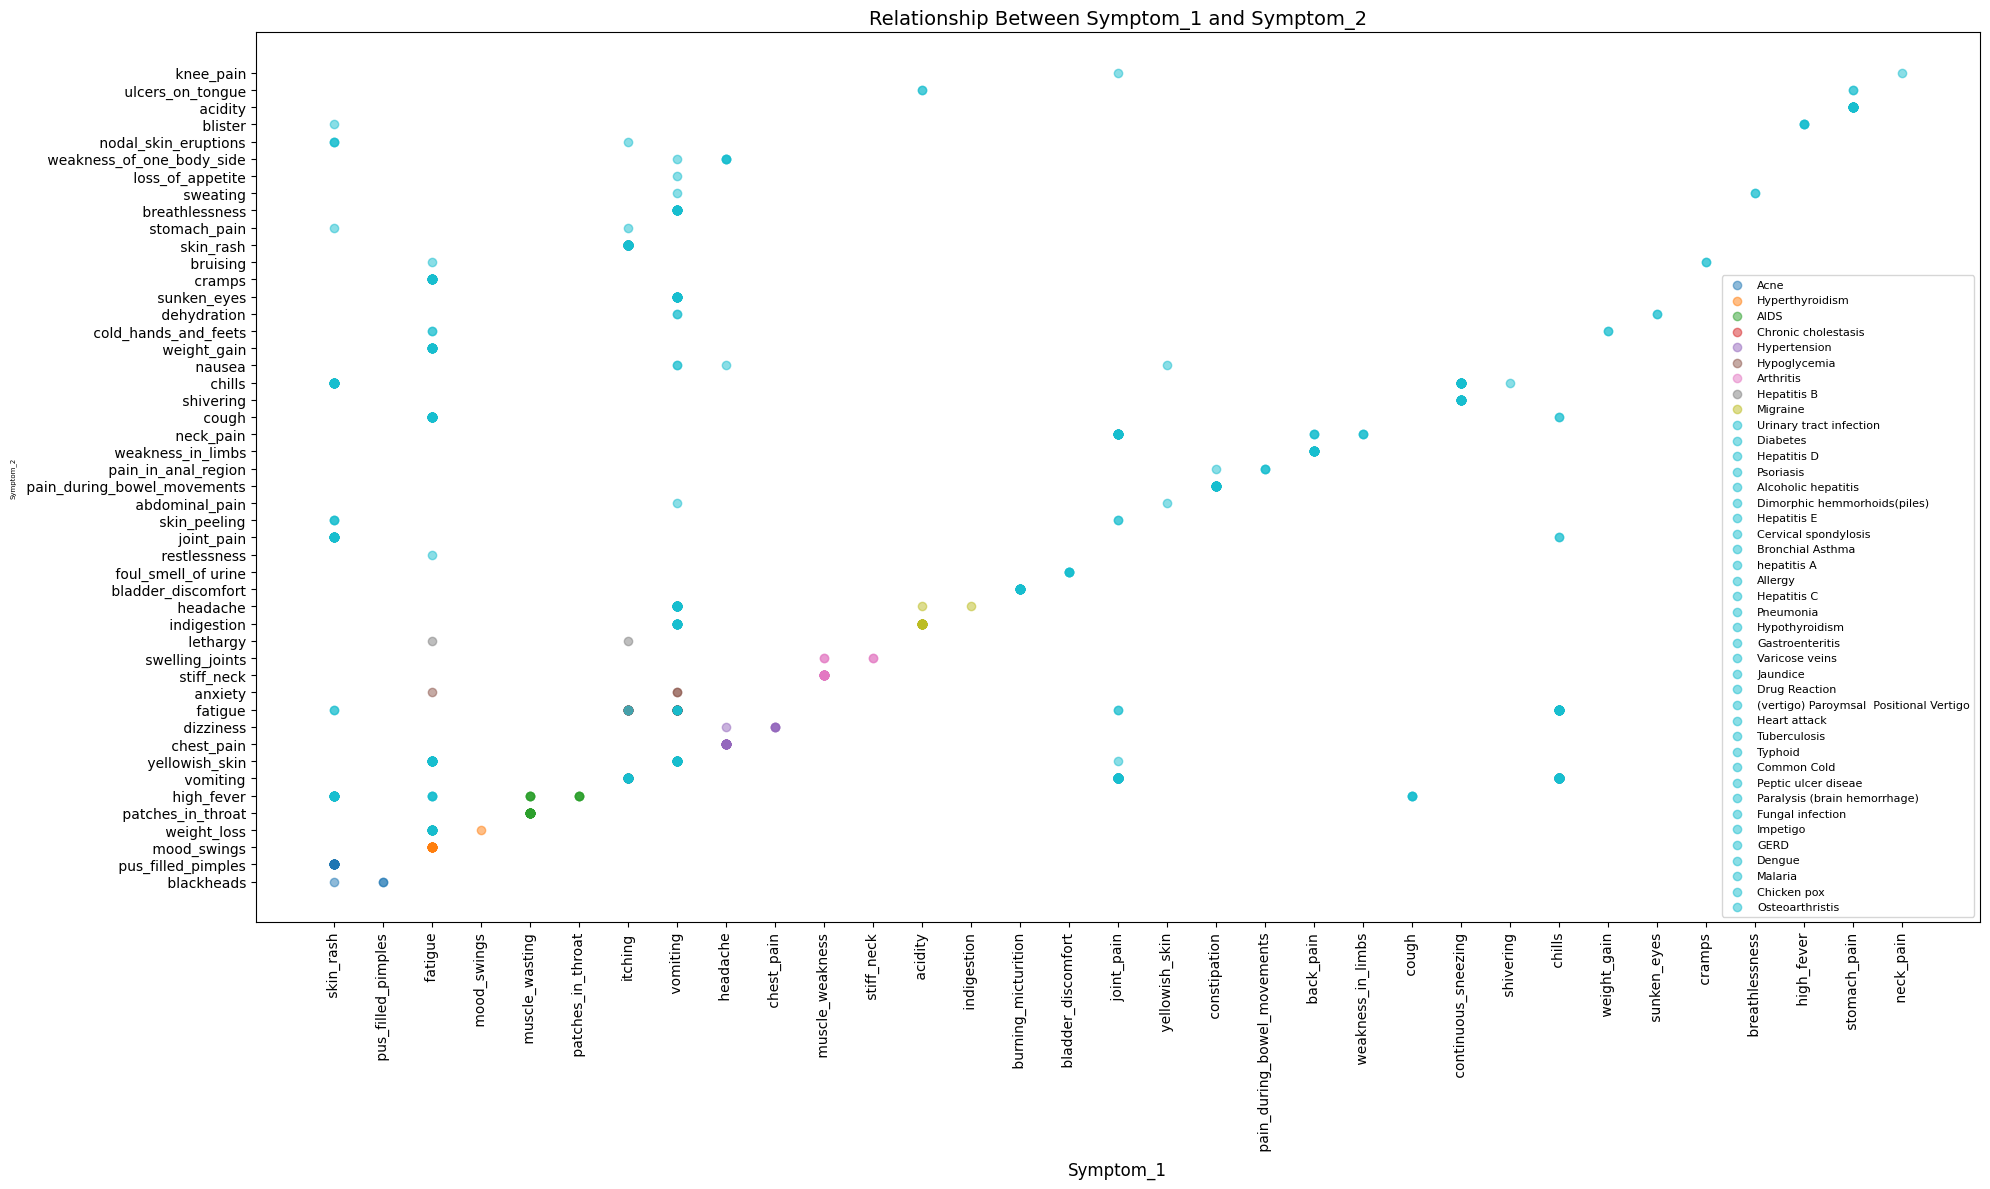

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
sym_des = pd.read_csv("symtoms_df.csv")

# Choose the symptoms for the scatter plot
symptom_x = 'Symptom_1'
symptom_y = 'Symptom_2'

# Filter out rows where either symptom_x or symptom_y is missing
filtered_data = sym_des.dropna(subset=[symptom_x, symptom_y])

# Sample a subset of the data for plotting (optional)
sample_size = 1000
if len(filtered_data) > sample_size:
    filtered_data = filtered_data.sample(sample_size, random_state=42)

# Create a color map for different diseases
disease_color_map = {disease: plt.cm.tab10(i) for i, disease in enumerate(filtered_data['Disease'].unique())}

# Plotting the scatter plot
plt.figure(figsize=(20, 12))
for disease, color in disease_color_map.items():
    disease_data = filtered_data[filtered_data['Disease'] == disease]
    plt.scatter(disease_data[symptom_x], disease_data[symptom_y], label=disease, color=color, alpha=0.5)

plt.xlabel(symptom_x, fontsize=12)
plt.ylabel(symptom_y, fontsize=5)
plt.title(f'Relationship Between {symptom_x} and {symptom_y}', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()



In [39]:
medications

,Disease,Medication
0,Fungal infection,"['Antifungal Cream', 'Fluconazole', 'Terbinafi..."
1,Allergy,"['Antihistamines', 'Decongestants', 'Epinephri..."
2,GERD,"['Proton Pump Inhibitors (PPIs)', 'H2 Blockers..."
3,Chronic cholestasis,"['Ursodeoxycholic acid', 'Cholestyramine', 'Me..."
4,Drug Reaction,"['Antihistamines', 'Epinephrine', 'Corticoster..."
5,Peptic ulcer disease,"['Antibiotics', 'Proton Pump Inhibitors (PPIs)..."
6,AIDS,"['Antiretroviral drugs', 'Protease inhibitors'..."
7,Diabetes,"['Insulin', 'Metformin', 'Sulfonylureas', 'DPP..."
8,Gastroenteritis,"['Antibiotics', 'Antiemetic drugs', 'Antidiarr..."
9,Bronchial Asthma,"['Bronchodilators', 'Inhaled corticosteroids',..."


In [40]:
print(medications.columns)


Index(['Disease', 'Medication'], dtype='object')


In [41]:
precautions

,Unnamed: 0,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths
5,5,GERD,avoid fatty spicy food,avoid lying down after eating,maintain healthy weight,exercise
6,6,Chronic cholestasis,cold baths,anti itch medicine,consult doctor,eat healthy
7,7,hepatitis A,Consult nearest hospital,wash hands through,avoid fatty spicy food,medication
8,8,Osteoarthristis,acetaminophen,consult nearest hospital,follow up,salt baths
9,9,(vertigo) Paroymsal Positional Vertigo,lie down,avoid sudden change in body,avoid abrupt head movment,relax


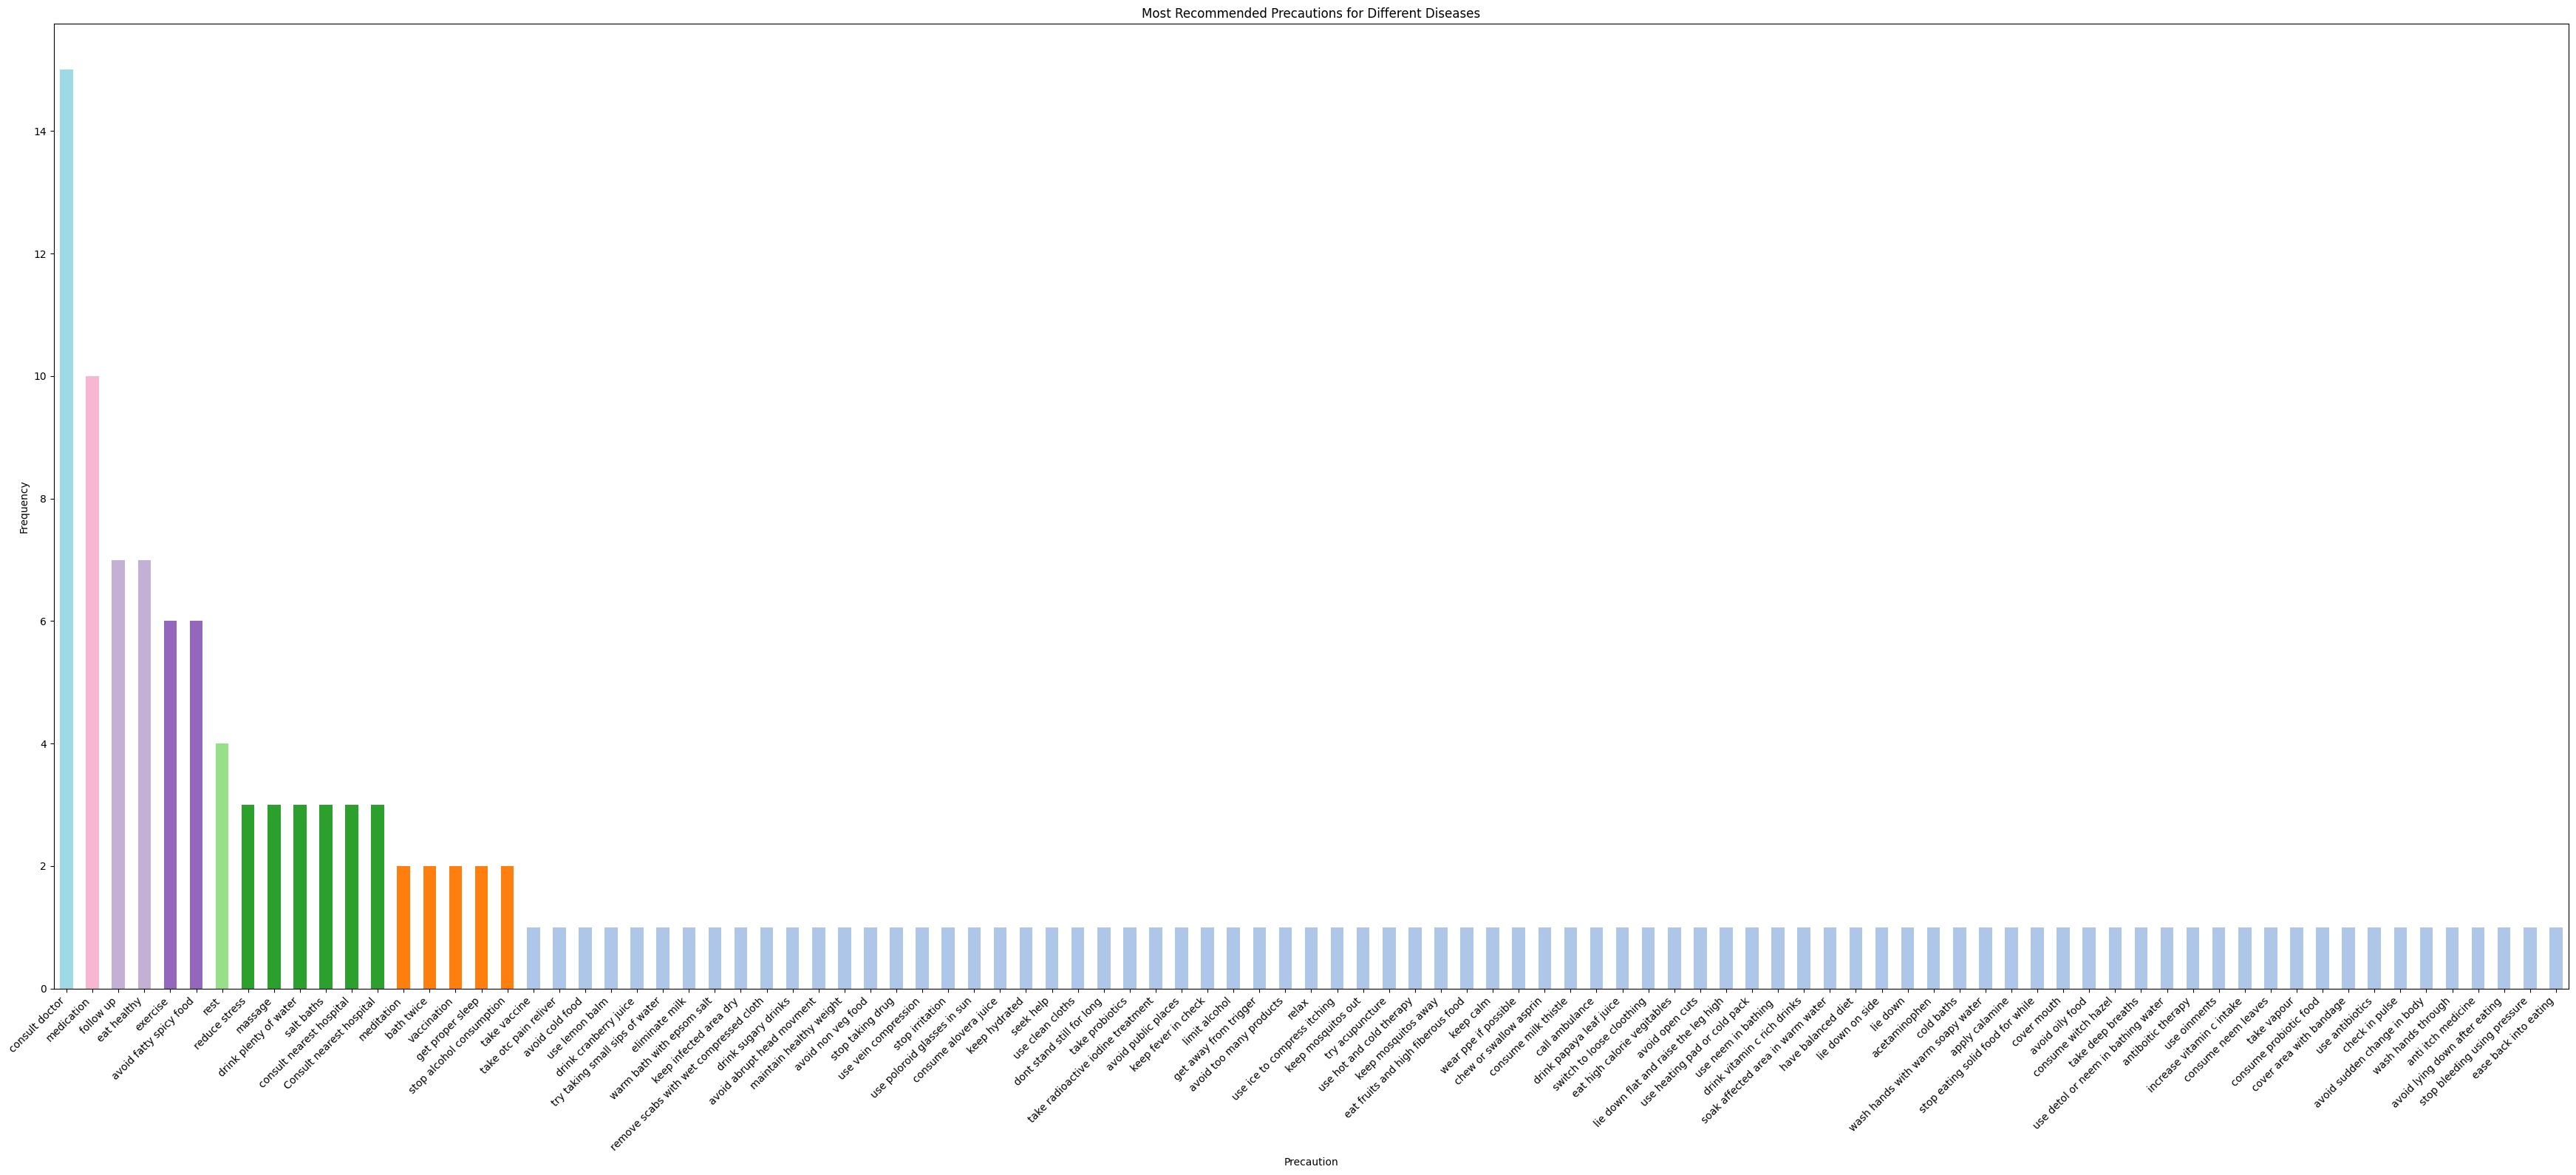

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the precautions DataFrame
precautions = pd.read_csv("precautions_df.csv")

# Extracting disease names and precaution columns
disease_column = 'Disease'
precaution_columns = ['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']

# Combine all precaution columns into a single series
all_precautions = pd.concat([precautions[column] for column in precaution_columns], ignore_index=True)

# Count the occurrences of each precaution
precaution_freq = all_precautions.value_counts()

# Plot the top precautions for each disease as a bar chart with colorful bars
plt.figure(figsize=(35, 16))

# Define a colormap based on precaution frequencies
colors = plt.cm.tab20(precaution_freq / precaution_freq.max())

precaution_freq.plot(kind='bar', color=colors)
plt.title('Most Recommended Precautions for Different Diseases')
plt.xlabel('Precaution')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [43]:
#============================================================
# custome and helping functions
#==========================helper functions================
def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis]['workout']

    return desc, pre, med, die, wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer disease', 1: 'AIDS', 12: 'Diabetes', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemorrhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthritis', 5: 'Arthritis', 0: '(vertigo) Paroxysmal Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}
#symptoms = [symptom.lower().replace(" ", "_") for symptom in symptoms_dict]
# Replace underscores with spaces
symptoms_dict = {symptom.replace("_", " ").lower(): index for symptom, index in symptoms_dict.items()}

# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]


In [44]:
# Assuming symptoms_dict is defined as per your previous example

# Convert symptom keys to lowercase and remove underscores and special characters
symptoms_dict = {symptom.lower().replace("_", "").replace(" ", ""): index for symptom, index in symptoms_dict.items()}

# Test input
symptom_input = 'skin_rash'

# Convert input to lowercase and remove underscores and special characters
symptom_input = symptom_input.lower().replace("_", "").replace(" ", "")

# Check if symptom_input exists in symptoms_dict
if symptom_input in symptoms_dict:
    # Get the index corresponding to the symptom
    symptom_index = symptoms_dict[symptom_input]
    print("Symptom index:", symptom_index)
else:
    print("Symptom not found in the dictionary.")


Symptom index: 1


In [45]:
# Convert symptom keys to lower case
symptoms_dict = {symptom.lower(): index for symptom, index in symptoms_dict.items()}

# Model Prediction function
def get_predicted_value(patient_symptoms):
    # Convert user input symptoms to lower case
    patient_symptoms = [symptom.lower() for symptom in patient_symptoms]
    
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        if item in symptoms_dict:
            input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]


In [46]:
# Display column names of precautions dataset
print("Columns of precautions dataset:", precautions.columns)

# Display column names of diets dataset
print("Columns of diets dataset:", diets.columns)


Columns of precautions dataset: Index(['Unnamed: 0', 'Disease', 'Precaution_1', 'Precaution_2', 'Precaution_3',
       'Precaution_4'],
      dtype='object')
Columns of diets dataset: Index(['Disease', 'Diet'], dtype='object')


In [ ]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # yellow_crust_ooze,red_sore_around_nose,small_dents_in_nails,inflammatory_nails,blister
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1


In [ ]:
# let's use pycharm flask app
# but install this version in pycharm
import sklearn
print(sklearn.__version__)